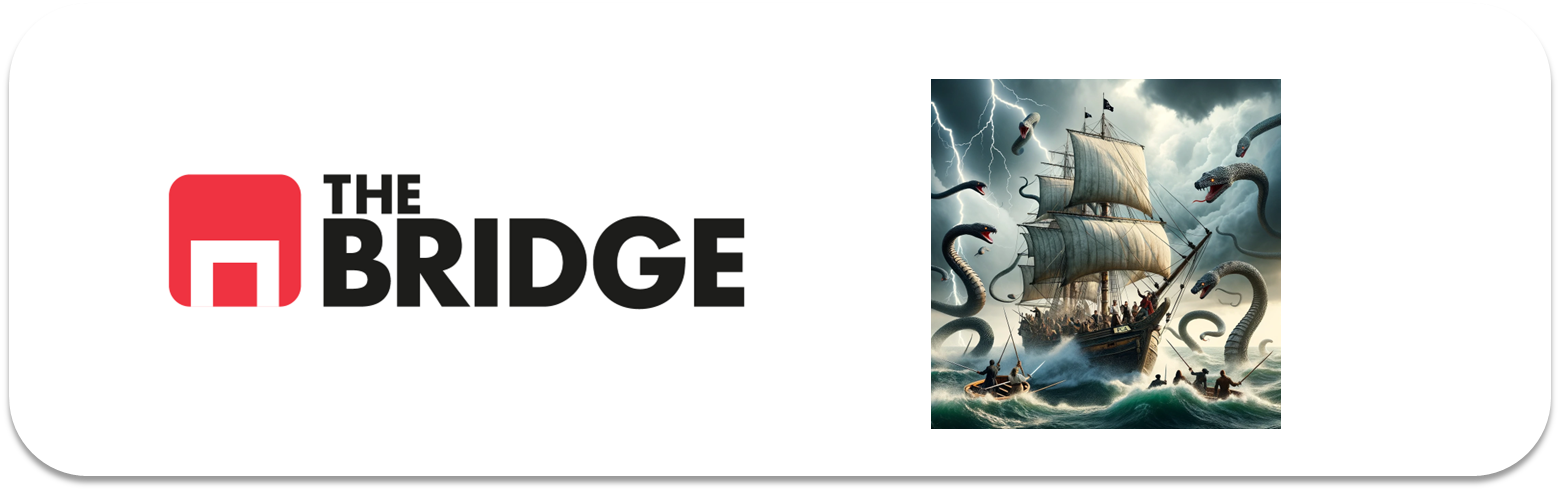

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [59]:
import numpy as np
import pandas as pd


import seaborn as sns
import bootcampviztools as bt

from sklearn.model_selection import train_test_split

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


## Carga de datos

In [140]:
df = pd.read_csv("./data/credit_npo.csv")
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

## 1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.


In [142]:
df = df.dropna()

In [143]:
df["NumberOfTime30-59DaysPastDueNotWorse"].value_counts()

NumberOfTime30-59DaysPastDueNotWorse
0     9818
1     1354
2      397
3      127
4       64
5       23
6       20
98      10
8        2
7        1
Name: count, dtype: int64

In [144]:
df["NumberOfOpenCreditLinesAndLoans"].value_counts()

NumberOfOpenCreditLinesAndLoans
7     1110
6     1031
8     1009
9      965
5      963
4      848
10     765
11     719
3      638
12     574
13     454
2      445
14     365
15     338
1      307
16     236
17     216
18     151
19     129
20     118
0      112
21      62
22      61
23      39
24      38
25      30
26      19
27      16
28      13
29      10
30      10
31       7
33       4
32       3
34       2
35       2
48       1
41       1
49       1
43       1
36       1
38       1
40       1
Name: count, dtype: int64

In [145]:
df["NumberOfTimes90DaysLate"].value_counts()

NumberOfTimes90DaysLate
0     11156
1       394
2       142
3        54
4        31
5        14
98       10
6         6
8         3
7         3
10        1
9         1
13        1
Name: count, dtype: int64

In [146]:
df["NumberRealEstateLoansOrLines"].value_counts()

NumberRealEstateLoansOrLines
0     4233
1     4149
2     2585
3      530
4      179
5       74
6       27
7       13
8        9
9        4
11       4
12       3
10       2
16       2
19       1
13       1
Name: count, dtype: int64

In [147]:
df["NumberOfTime60-89DaysPastDueNotWorse"].unique()

array([ 0,  2,  1,  3, 98,  4,  5, 11], dtype=int64)

In [148]:
# Definir los tramos
bins = [-float('inf'), 0, 97, float('inf')]
labels = ['cero', 'medio', 'alto']

# Convertir a categórica
df["NumberOfTime30-59DaysPastDueNotWorse"] = pd.cut(df["NumberOfTime30-59DaysPastDueNotWorse"], bins=bins, labels=labels, right=True)
df["NumberOfTimes90DaysLate"] = pd.cut(df["NumberOfTimes90DaysLate"], bins=bins, labels=labels, right=True)
df['NumberOfTime60-89DaysPastDueNotWorse'] = pd.cut(df['NumberOfTime60-89DaysPastDueNotWorse'], bins=bins, labels=labels, right=True)

C:\Users\jose\AppData\Local\Temp\ipykernel_17484\2062734855.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["NumberOfTime30-59DaysPastDueNotWorse"] = pd.cut(df["NumberOfTime30-59DaysPastDueNotWorse"], bins=bins, labels=labels, right=True)
C:\Users\jose\AppData\Local\Temp\ipykernel_17484\2062734855.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["NumberOfTimes90DaysLate"] = pd.cut(df["NumberOfTimes90DaysLate"], bins=bins, labels=labels, right=True)
C:\Users\jose\AppData\Local\Temp\ipykernel_174

## 2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 

### 1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.


Divide en train y test. Analiza el target de forma breve.

In [155]:
train_set, test_set = train_test_split(df,test_size=0.2,random_state=42)
print(len(train_set))
print(len(test_set))

9452
2364


In [156]:
target = "SeriousDlqin2yrs"

df[target].value_counts(True)

SeriousDlqin2yrs
0    0.929756
1    0.070244
Name: proportion, dtype: float64

In [157]:
X_train = train_set.drop(target, axis=1)
y_train = train_set[target]
X_test = test_set.drop(target, axis=1)
y_test = test_set[target]

In [158]:
features_num = train_set.describe().columns.to_list()
features_num.remove(target)
features_num

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents']

In [160]:
features_cat = [col for col in train_set.columns.to_list() if col not in features_num]
features_cat.remove(target)
features_cat

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

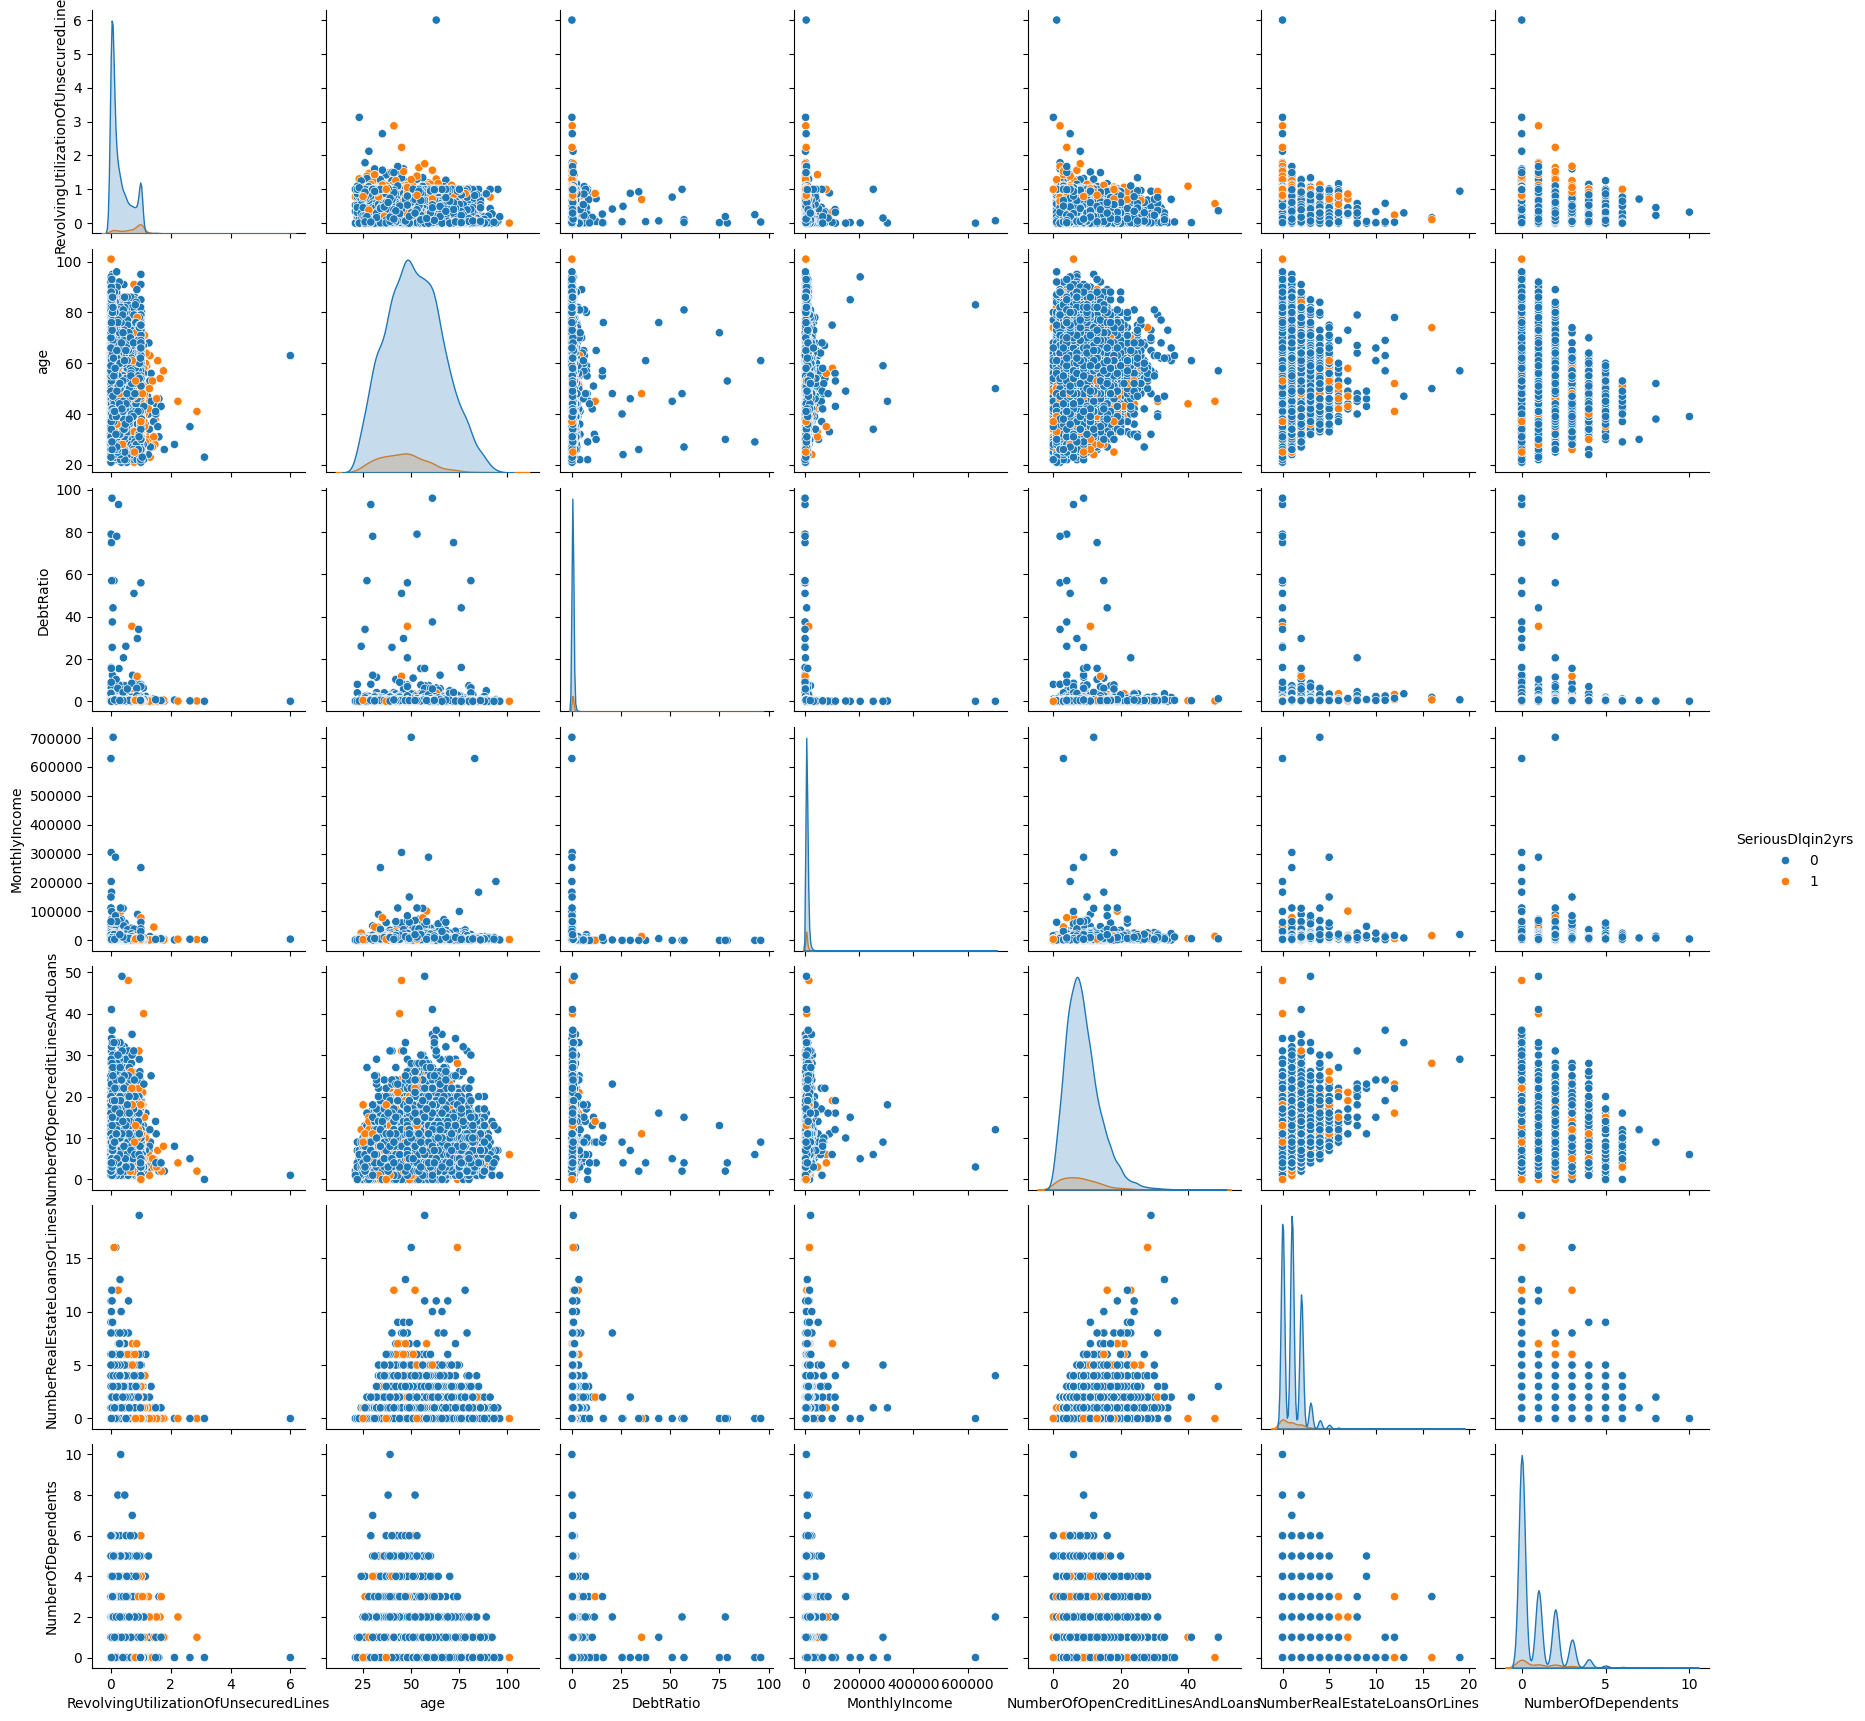

In [161]:
sns.pairplot(train_set, hue=target);

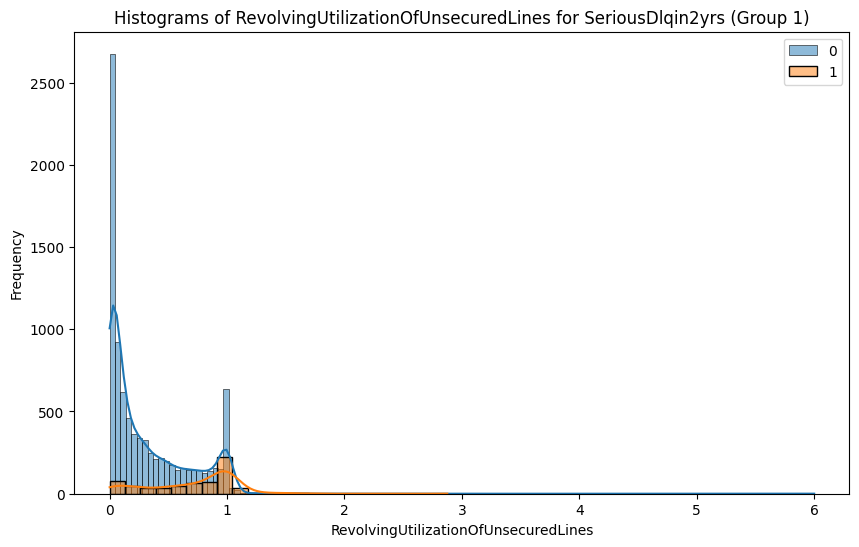

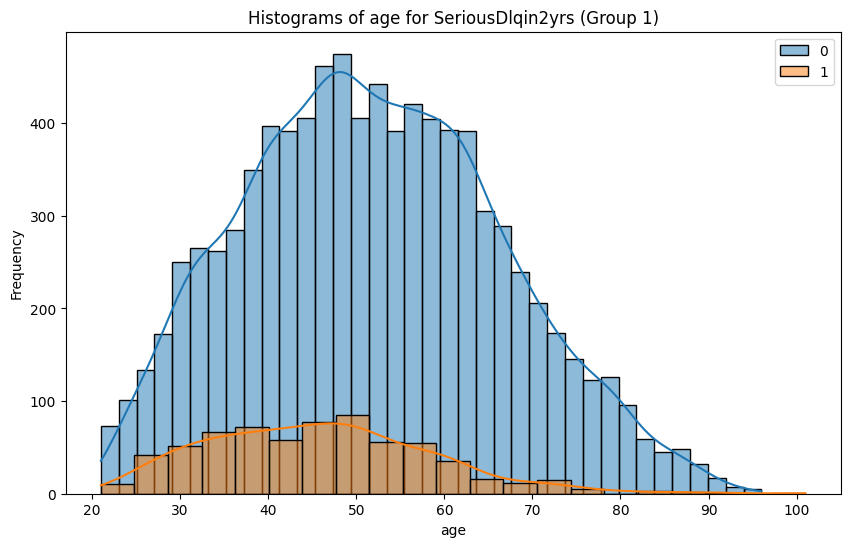

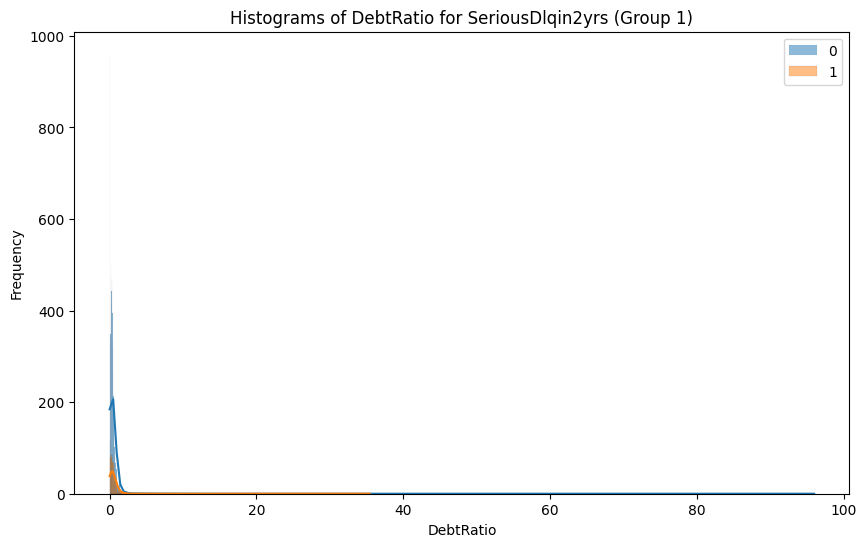

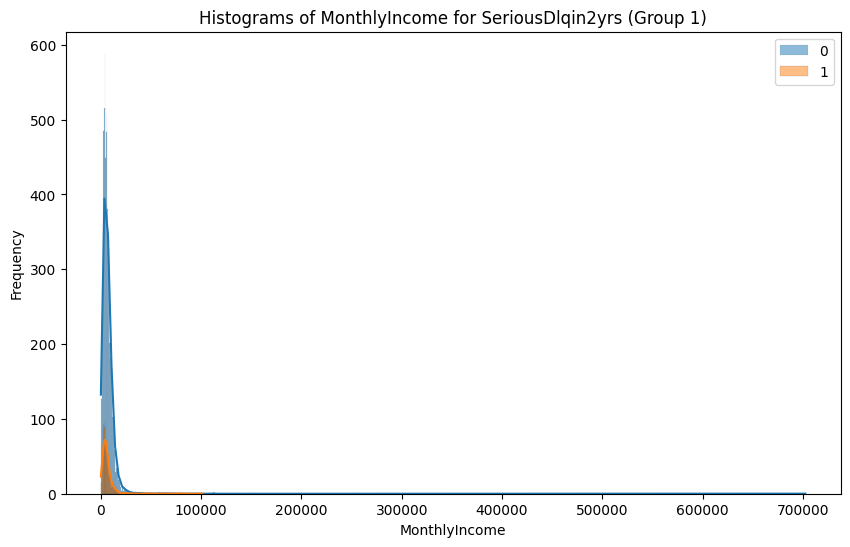

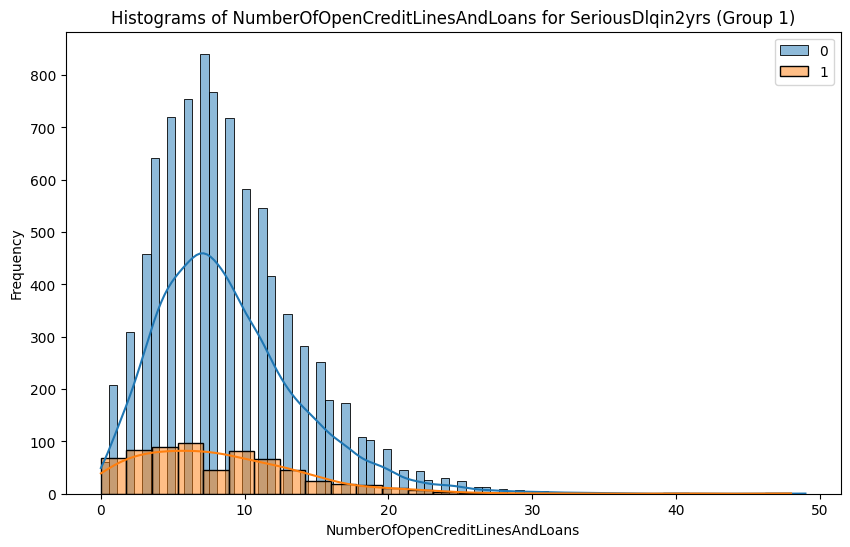

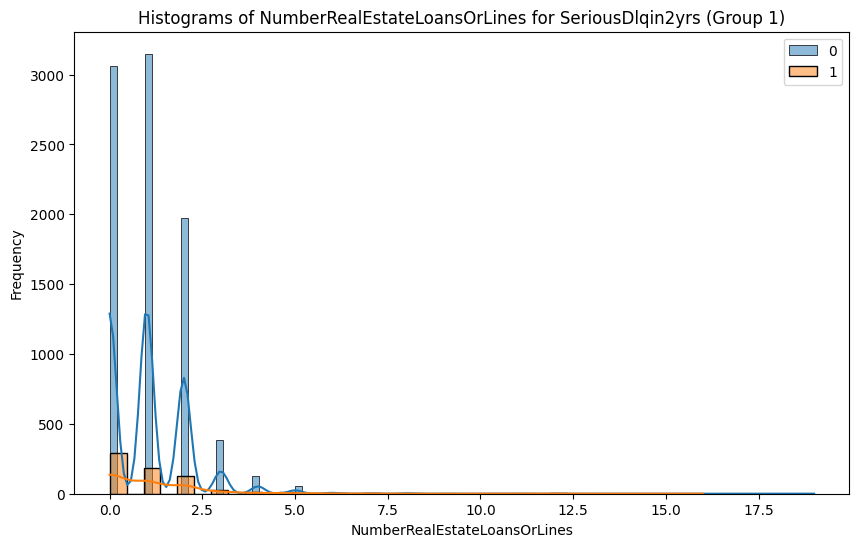

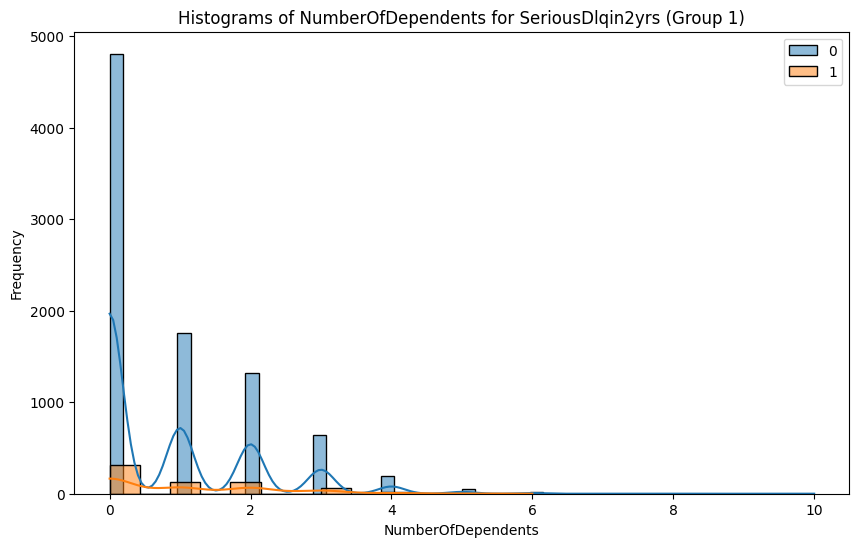

In [162]:
for col in features_num:
    bt.plot_grouped_histograms(train_set, cat_col = target, num_col = col, group_size = train_set[target].nunique())

Hay algunas que no se visualizan bien

<Figure size 640x480 with 0 Axes>

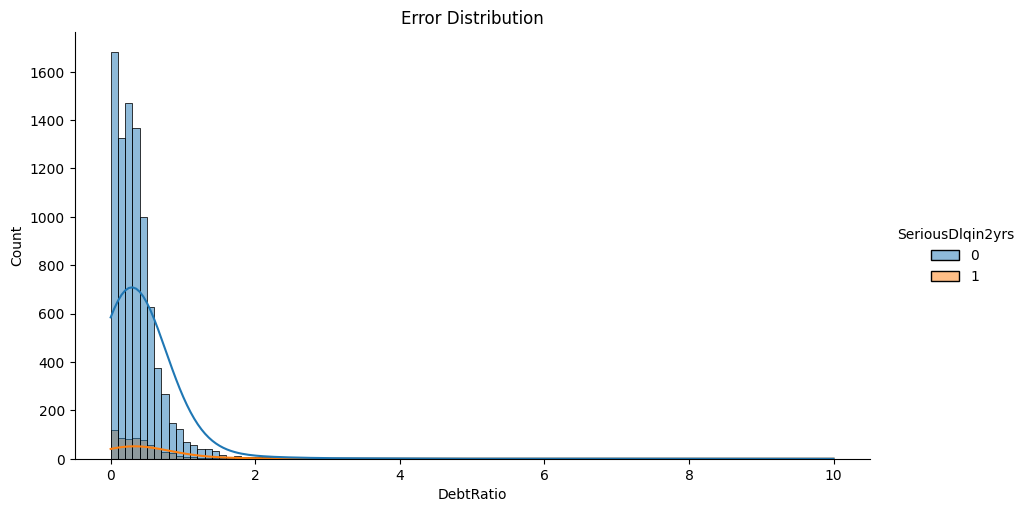

In [193]:
import matplotlib.pyplot as plt

plt.figure()
min_x, max_x = 0, 10
g = sns.displot(data=train_set, x='DebtRatio', hue=target, kde=True, kind="hist", bins=100, binrange=(min_x, max_x), legend=True, aspect=1.8,
                kde_kws={'clip': (min_x, max_x)})
g.set(title='Error Distribution');
#plt.ylim(0,1000);

<Figure size 640x480 with 0 Axes>

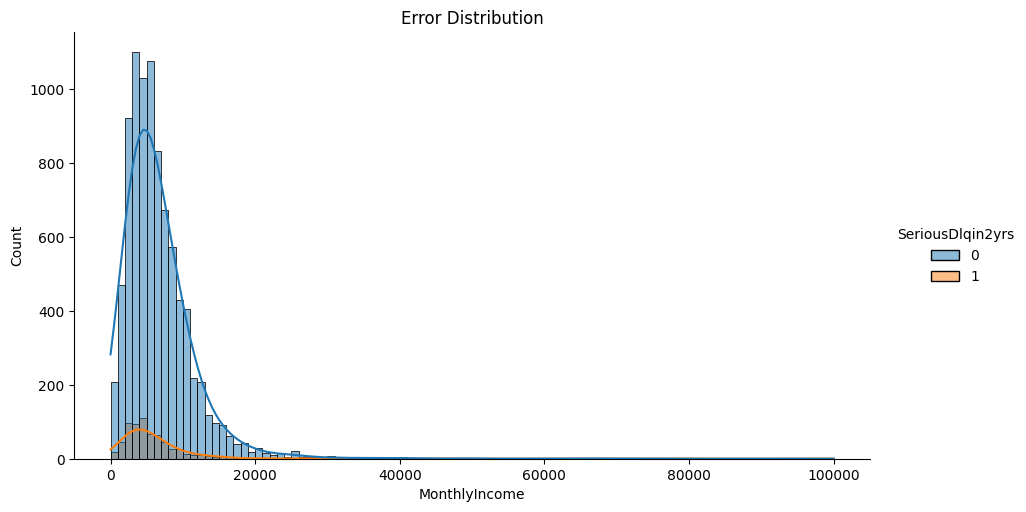

In [195]:
plt.figure()
min_x, max_x = 0, 100000
g = sns.displot(data=train_set, x='MonthlyIncome', hue=target, kde=True, kind="hist", bins=100, binrange=(min_x, max_x), legend=True, aspect=1.8,
                kde_kws={'clip': (min_x, max_x)})
g.set(title='Error Distribution');
#plt.ylim(0,1000);

<Figure size 640x480 with 0 Axes>

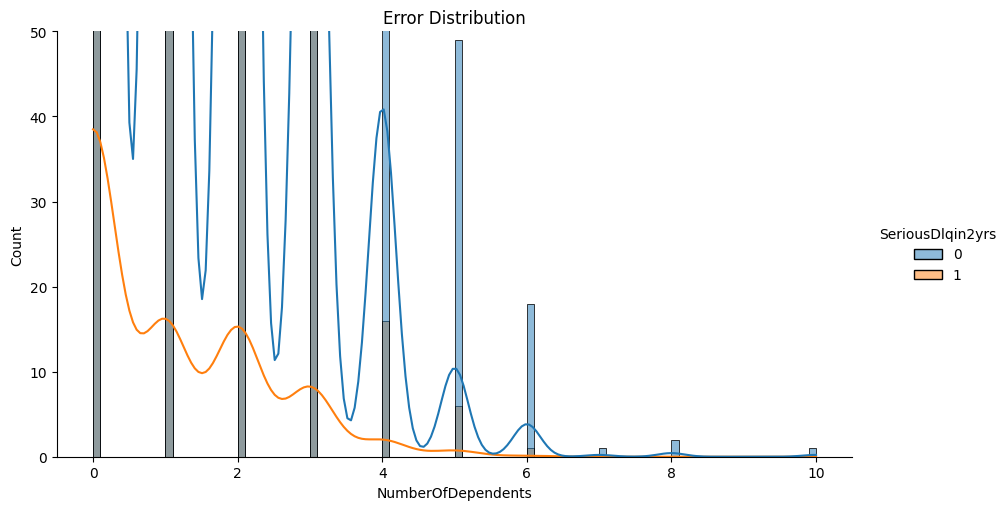

In [209]:
import matplotlib.pyplot as plt

plt.figure()
min_x, max_x = 0, 10
g = sns.displot(data=train_set, x='NumberOfDependents', hue=target, kde=True, kind="hist", bins=100, binrange=(min_x, max_x), legend=True, aspect=1.8,
                kde_kws={'clip': (min_x, max_x)})
g.set(title='Error Distribution');
plt.ylim(0,50);

Aquí se ve claramente que debtratio no discrimina. Por lo que podría ser descartada.  
Tampoco MonthlyIncome discrimina.   
NumberOfDependents parece que discrimina para un alto numero de dependientes.

<Axes: >

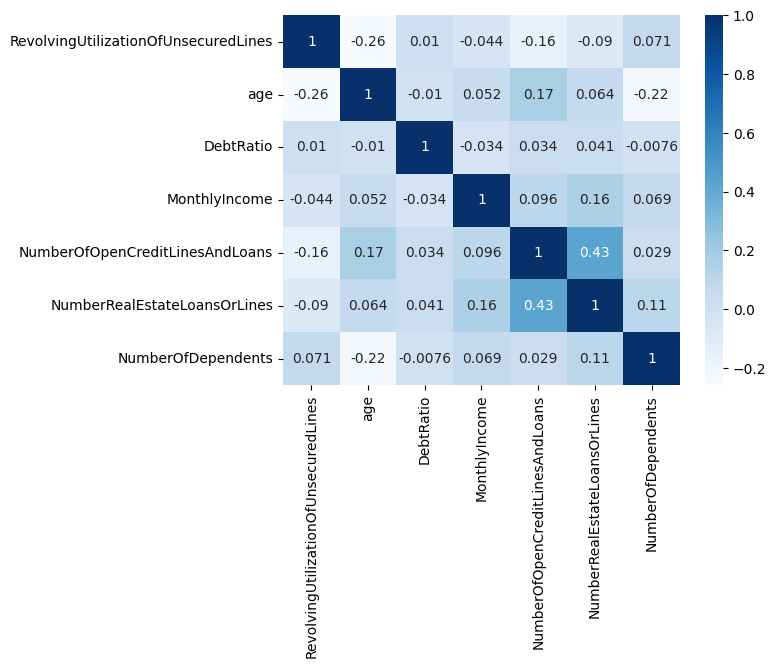

In [163]:
corr= train_set[features_num].corr()
sns.heatmap(corr[features_num], annot=True, cmap= "Blues")

Aquí vemos una ligera correlacion de NumberOfOpenCreditLinesAndLoans y NumberRealEstateLoansOrLines.  
Nos quedamos con NumberOfOpenCreditLinesAndLoans que en la grafica se veio que podría discriminar un poco en los valores mas bajos.

In [210]:
features_num_sel1 = features_num.copy()
features_num_sel1.remove("DebtRatio")
features_num_sel1.remove("NumberOfOpenCreditLinesAndLoans")
features_num_sel1.remove("MonthlyIncome")
features_num_sel1

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents']

c:\Users\jose\Documents\bootcamp\DS_Online_Octubre24_Exercises\04_Machine_Learning\Sprint_14\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


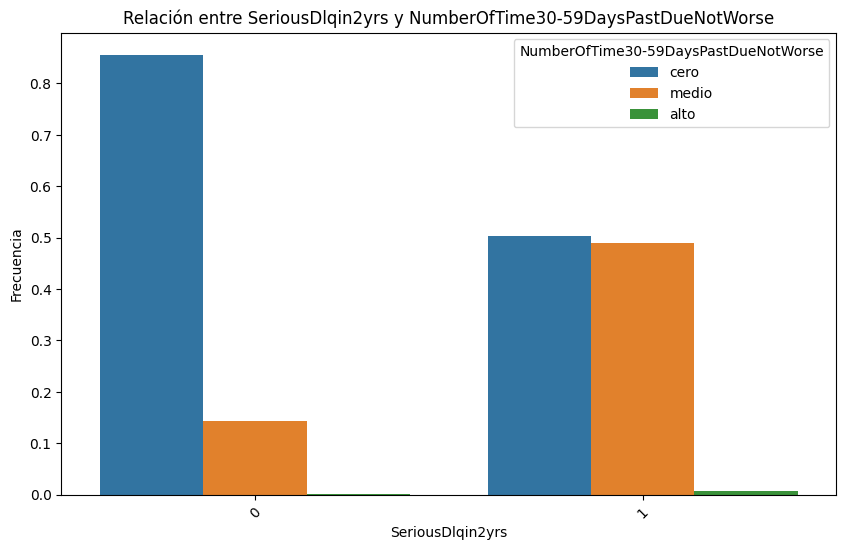

c:\Users\jose\Documents\bootcamp\DS_Online_Octubre24_Exercises\04_Machine_Learning\Sprint_14\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


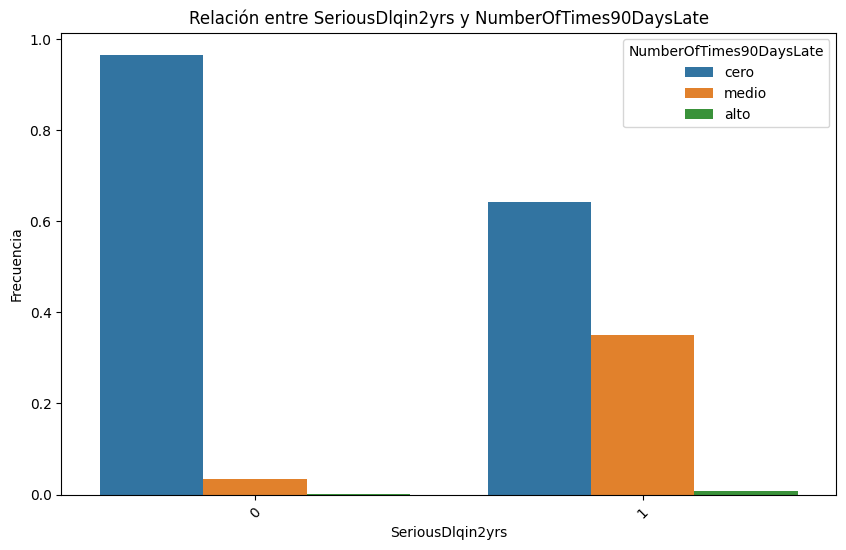

c:\Users\jose\Documents\bootcamp\DS_Online_Octubre24_Exercises\04_Machine_Learning\Sprint_14\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


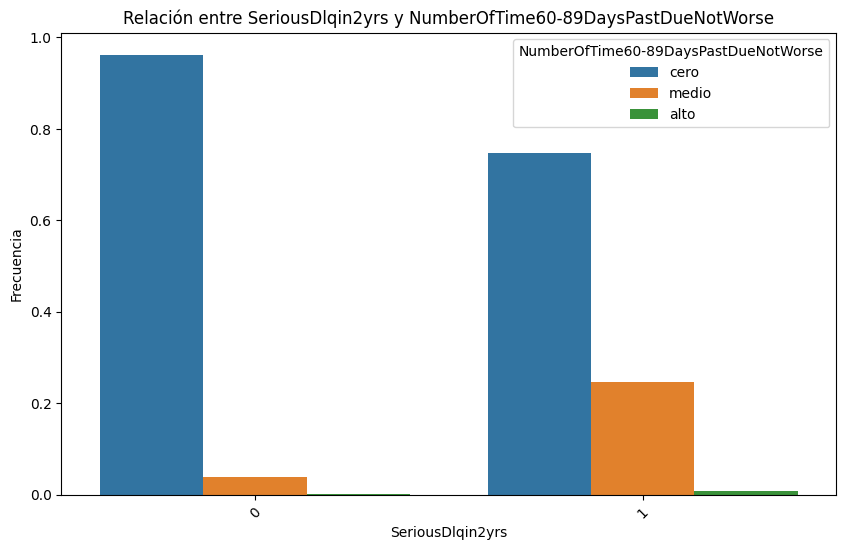

In [165]:
for col in features_cat:
    bt.plot_categorical_relationship_fin(train_set,cat_col1=target,cat_col2=col, relative_freq=True);

Nos quedamos con las variables categoricas porque si que podrían discriminar

In [215]:
features_sel1 = features_cat + features_num_sel1
features_sel1

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents']

In [212]:
X_train_visual = X_train[features_sel1]
X_train_visual

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,RevolvingUtilizationOfUnsecuredLines,age,NumberRealEstateLoansOrLines,NumberOfDependents
11145,cero,cero,cero,0.391240,68,2,0.0
2012,cero,cero,cero,0.906540,59,0,1.0
5428,medio,cero,cero,0.933223,52,1,3.0
12130,cero,cero,cero,0.857859,50,1,0.0
36,cero,cero,cero,0.000000,61,1,1.0
...,...,...,...,...,...,...,...
11966,cero,cero,cero,0.397822,53,2,0.0
5512,cero,cero,cero,0.015171,76,0,0.0
5719,cero,cero,cero,0.988201,62,1,0.0
922,cero,cero,cero,0.122072,41,1,1.0


Transformar features categoricas

### 2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 


In [244]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=3)
x_data_kbest = selector.fit_transform(X_train[features_num], y_train)
# X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())

# X_data_kbest_test = selector.transform(X_test[features_num])
# X_test_kbest = pd.DataFrame(X_data_kbest_test, columns = selector.get_feature_names_out())
features_num_kbest =  selector.get_feature_names_out().tolist()
features_num_kbest

['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfDependents']

In [245]:
# Volviendo al titanic
from sklearn.metrics import mutual_info_score

for col in features_cat:
    print(f"MI({col};{target}):", mutual_info_score(train_set[col],train_set[target]))

MI(NumberOfTime30-59DaysPastDueNotWorse;SeriousDlqin2yrs): 0.022472675391077612
MI(NumberOfTimes90DaysLate;SeriousDlqin2yrs): 0.034270989356132826
MI(NumberOfTime60-89DaysPastDueNotWorse;SeriousDlqin2yrs): 0.017920132713642276


Nos quedamos con todas las categoricas porque tiene similar nivel de informacion mutua con el target

In [246]:
features_kbest = features_num_kbest + features_cat
features_kbest

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfDependents',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [271]:
X_train_kbest = X_train[features_kbest]
X_train_kbest

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfDependents,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse
11145,0.391240,68,0.0,0.0,0.0,0.0
2012,0.906540,59,1.0,0.0,0.0,0.0
5428,0.933223,52,3.0,1.0,0.0,0.0
12130,0.857859,50,0.0,0.0,0.0,0.0
36,0.000000,61,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
11966,0.397822,53,0.0,0.0,0.0,0.0
5512,0.015171,76,0.0,0.0,0.0,0.0
5719,0.988201,62,0.0,0.0,0.0,0.0
922,0.122072,41,1.0,0.0,0.0,0.0


### Transformo las variables categoricas

In [240]:
features_cat

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [241]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['cero', 'medio', 'alto']])
X_train['NumberOfTime30-59DaysPastDueNotWorse'] = oe.fit_transform(X_train[['NumberOfTime30-59DaysPastDueNotWorse']])
X_train['NumberOfTimes90DaysLate'] = oe.fit_transform(X_train[['NumberOfTimes90DaysLate']])
X_train['NumberOfTime60-89DaysPastDueNotWorse'] = oe.fit_transform(X_train[['NumberOfTime60-89DaysPastDueNotWorse']])


In [242]:
X_test['NumberOfTime30-59DaysPastDueNotWorse'] = oe.fit_transform(X_test[['NumberOfTime30-59DaysPastDueNotWorse']])
X_test['NumberOfTimes90DaysLate'] = oe.fit_transform(X_test[['NumberOfTimes90DaysLate']])
X_test['NumberOfTime60-89DaysPastDueNotWorse'] = oe.fit_transform(X_test[['NumberOfTime60-89DaysPastDueNotWorse']])

Ahora con las categoricas codificadas actualizamo los dataset de visual y kbest

In [299]:
X_train_visual = X_train[features_sel1]
X_test_visual = X_test[features_sel1]

X_train_kbest = X_train[features_kbest]
X_test_kbest = X_test[features_kbest]

###  3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)

In [252]:
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier

#Entreno un RandomForest
rf_selector = RandomForestClassifier(max_depth=5, random_state=42)

selector_model = SelectFromModel(estimator = rf_selector, max_features=6, threshold=-np.inf) # El modelo debe tener un atributo feature_importances_ o un atributo coef_
selector_model.fit(X_train,y_train) 

X_train_selector = pd.DataFrame(selector_model.transform(X_train), columns = selector_model.get_feature_names_out())
X_test_selector = pd.DataFrame(selector_model.transform(X_test), columns = selector_model.get_feature_names_out())

selector_model.get_feature_names_out()

array(['RevolvingUtilizationOfUnsecuredLines',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberOfTime60-89DaysPastDueNotWorse'], dtype=object)

###    4. Selección de las mejores features empleando RFE.


In [254]:
from sklearn.feature_selection import RFE

rf_RFE = RandomForestClassifier(max_depth=5, random_state= 42) # Puedes usar tu modelo, o modelos a probar o un modelo "proxy" como en la selección por modelo

rfe = RFE(estimator = rf_RFE,
          n_features_to_select= 6, # Iterará hasta quedarse con 6
          step = 1) # Elimina de una en una, pero es configurable

rfe.fit(X_train, y_train)
print(rfe.ranking_)
pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = X_train.columns).sort_values("ranking")

[1 2 1 1 3 1 1 4 1 5]


,ranking
RevolvingUtilizationOfUnsecuredLines,1
NumberOfTime30-59DaysPastDueNotWorse,1
DebtRatio,1
NumberOfOpenCreditLinesAndLoans,1
NumberOfTimes90DaysLate,1
NumberOfTime60-89DaysPastDueNotWorse,1
age,2
MonthlyIncome,3
NumberRealEstateLoansOrLines,4
NumberOfDependents,5


In [255]:
X_train_rfe = pd.DataFrame(rfe.transform(X_train), columns = rfe.get_feature_names_out())
X_test_rfe = pd.DataFrame(rfe.transform(X_test), columns = rfe.get_feature_names_out())
X_test_rfe

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse
0,0.146506,0.0,0.091313,14.0,0.0,0.0
1,0.000000,0.0,0.000000,4.0,0.0,0.0
2,0.527101,1.0,0.467540,15.0,1.0,1.0
3,0.594313,0.0,0.991717,9.0,0.0,0.0
4,0.251177,0.0,0.616590,8.0,0.0,0.0
...,...,...,...,...,...,...
2359,0.153984,0.0,0.293055,10.0,0.0,0.0
2360,0.143378,0.0,0.229799,19.0,0.0,0.0
2361,0.528468,0.0,0.849322,8.0,0.0,0.0
2362,0.303600,0.0,0.474848,7.0,0.0,0.0


###    5. Selección de las mejores features empleando SFS.


In [258]:
from sklearn.feature_selection import SequentialFeatureSelector

rf_SFS = RandomForestClassifier(max_depth=5,random_state = 42)

sfs_forward = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 6,
                                        cv = 4,
                                        scoring = "balanced_accuracy")


sfs_forward.fit(X_train, y_train)


SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(max_depth=5,
                                                           random_state=42),
                          n_features_to_select=6, scoring='balanced_accuracy')

In [262]:
print("Elegidasd SFS:", sfs_forward.get_feature_names_out())

Elegidasd SFS: ['RevolvingUtilizationOfUnsecuredLines'
 'NumberOfTime30-59DaysPastDueNotWorse' 'NumberOfOpenCreditLinesAndLoans'
 'NumberOfTimes90DaysLate' 'NumberRealEstateLoansOrLines'
 'NumberOfTime60-89DaysPastDueNotWorse']


In [265]:
X_train_sfs = pd.DataFrame(sfs_forward.transform(X_train), columns = sfs_forward.get_feature_names_out())

In [266]:
X_train_sfs

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
0,0.391240,0.0,13.0,0.0,2.0,0.0
1,0.906540,0.0,7.0,0.0,0.0,0.0
2,0.933223,1.0,3.0,0.0,1.0,0.0
3,0.857859,0.0,9.0,0.0,1.0,0.0
4,0.000000,0.0,5.0,0.0,1.0,0.0
...,...,...,...,...,...,...
9447,0.397822,0.0,14.0,0.0,2.0,0.0
9448,0.015171,0.0,4.0,0.0,0.0,0.0
9449,0.988201,0.0,4.0,0.0,1.0,0.0
9450,0.122072,0.0,9.0,0.0,1.0,0.0


### 6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

In [276]:
from collections import Counter

# Supongamos que estas son las listas de features seleccionadas por cada método
features_method_1 = ['feature1', 'feature2', 'feature3']
features_method_2 = ['feature2', 'feature3', 'feature4']
features_method_3 = ['feature1', 'feature2', 'feature5']
features_method_4 = ['feature1', 'feature3', 'feature5']
features_method_5 = ['feature2', 'feature4', 'feature5']

# Unir todas las listas
all_features = X_train_visual.columns.to_list() + X_train_kbest.columns.to_list() + X_train_selector.columns.to_list() + X_train_rfe.columns.to_list() + X_train_sfs.columns.to_list()

# Contar la frecuencia de cada feature
feature_counts = Counter(all_features)

# Ordenar las features por frecuencia
sorted_features = [feature for feature, count in feature_counts.most_common()]

# Mostrar la lista definitiva de features
print("Lista definitiva de features ordenadas por popularidad:")
sorted_features


Lista definitiva de features ordenadas por popularidad:


['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'RevolvingUtilizationOfUnsecuredLines',
 'NumberOfOpenCreditLinesAndLoans',
 'age',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents',
 'DebtRatio']

La variable que ningun metodo incluyó fue:

In [277]:
[col for col in X_train.columns if col not in sorted_features]

['MonthlyIncome']

EL analisis visual no estuvo tan alejado de los demás metodos.  
Seis de las features elegidas visualmente estuvo entre las top7 de los modelos

In [291]:
[col for col in X_train_visual.columns if col in sorted_features[0:7]]

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberRealEstateLoansOrLines']

## 3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

In [342]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

model_names = ["Random Forest","LightGBM","CatBoost"]

rf_clf = RandomForestClassifier(random_state= 42)
lgb_clf = LGBMClassifier(random_state= 42, verbose = -100)
cat_clf = CatBoostClassifier(random_state= 42, verbose = False)

model_set = [rf_clf, lgb_clf, cat_clf]

metricas_cv = {}
valores = []
for nombre_modelo,modelo in zip(model_names, model_set):

    for nombre,set in zip(["Visual", "ANOVA", "SelectedFromModel", "RFE", "SFS", "Full_num_features"],[X_train_visual, X_train_kbest, X_train_selector, X_train_rfe, X_train_sfs, X_train]):
        combinacion = nombre_modelo + "-" + nombre
        print(f"Para <{combinacion}> con <num_features: {len(set.columns.to_list())}>")
        print(modelo)

        #print(np.mean(cross_val_score(modelo, set, y_train, cv = 5, scoring = "balanced_accuracy")))
    
        if nombre_modelo != "Logistic Regression":
            metricas_cv[combinacion] = cross_val_score(modelo, set, y_train, cv = 3, scoring = "balanced_accuracy")
        else:
            metricas_cv[combinacion] = cross_val_score(modelo, set, y_train, cv = 3, scoring = "balanced_accuracy") #Aquí iria el dataset escalado para la regresion logistica
        print(np.mean(metricas_cv[combinacion]), "\n")
        valores.append(np.mean(metricas_cv[combinacion]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]
best_score = np.max(valores)




Para <Random Forest-Visual> con <num_features: 7>
RandomForestClassifier(random_state=42)
0.5776247177799331 

Para <Random Forest-ANOVA> con <num_features: 6>
RandomForestClassifier(random_state=42)
0.5721473581295154 

Para <Random Forest-SelectedFromModel> con <num_features: 6>
RandomForestClassifier(random_state=42)
0.5785073412117292 

Para <Random Forest-RFE> con <num_features: 6>
RandomForestClassifier(random_state=42)
0.5785073412117292 

Para <Random Forest-SFS> con <num_features: 6>
RandomForestClassifier(random_state=42)
0.5881273564883814 

Para <Random Forest-Full_num_features> con <num_features: 10>
RandomForestClassifier(random_state=42)
0.5759867468542132 

Para <LightGBM-Visual> con <num_features: 7>
LGBMClassifier(random_state=42, verbose=-100)
0.5888362329539348 

Para <LightGBM-ANOVA> con <num_features: 6>
LGBMClassifier(random_state=42, verbose=-100)
0.580043293912566 

Para <LightGBM-SelectedFromModel> con <num_features: 6>
LGBMClassifier(random_state=42, verbose=

In [345]:
for comb_name, lista_valores in metricas_cv.items():
    print(f"Model <{comb_name}>, Accuracy_CV: {np.mean(lista_valores).round(4)}")
print(f"El ganador es {ganador} con {best_score.round(4)}")

Model <Random Forest-Visual>, Accuracy_CV: 0.5776
Model <Random Forest-ANOVA>, Accuracy_CV: 0.5721
Model <Random Forest-SelectedFromModel>, Accuracy_CV: 0.5785
Model <Random Forest-RFE>, Accuracy_CV: 0.5785
Model <Random Forest-SFS>, Accuracy_CV: 0.5881
Model <Random Forest-Full_num_features>, Accuracy_CV: 0.576
Model <LightGBM-Visual>, Accuracy_CV: 0.5888
Model <LightGBM-ANOVA>, Accuracy_CV: 0.58
Model <LightGBM-SelectedFromModel>, Accuracy_CV: 0.5766
Model <LightGBM-RFE>, Accuracy_CV: 0.5766
Model <LightGBM-SFS>, Accuracy_CV: 0.5793
Model <LightGBM-Full_num_features>, Accuracy_CV: 0.5824
Model <CatBoost-Visual>, Accuracy_CV: 0.5815
Model <CatBoost-ANOVA>, Accuracy_CV: 0.5736
Model <CatBoost-SelectedFromModel>, Accuracy_CV: 0.5772
Model <CatBoost-RFE>, Accuracy_CV: 0.5772
Model <CatBoost-SFS>, Accuracy_CV: 0.5806
Model <CatBoost-Full_num_features>, Accuracy_CV: 0.5877
El ganador es LightGBM-Visual con 0.5888


Lo ordenamos por orden descendente

In [346]:
# Calcular la media de los valores
mean_values = {key: np.mean(value) for key, value in metricas_cv.items()}

# Ordenar por media en orden descendente
sorted_mean_values = dict(sorted(mean_values.items(), key=lambda item: item[1], reverse=True))

# Imprimir los resultados
for model, mean in sorted_mean_values.items():
    print(f"{model}: {mean:.4f}")

LightGBM-Visual: 0.5888
Random Forest-SFS: 0.5881
CatBoost-Full_num_features: 0.5877
LightGBM-Full_num_features: 0.5824
CatBoost-Visual: 0.5815
CatBoost-SFS: 0.5806
LightGBM-ANOVA: 0.5800
LightGBM-SFS: 0.5793
Random Forest-SelectedFromModel: 0.5785
Random Forest-RFE: 0.5785
Random Forest-Visual: 0.5776
CatBoost-SelectedFromModel: 0.5772
CatBoost-RFE: 0.5772
LightGBM-SelectedFromModel: 0.5766
LightGBM-RFE: 0.5766
Random Forest-Full_num_features: 0.5760
CatBoost-ANOVA: 0.5736
Random Forest-ANOVA: 0.5721


## 4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.

In [348]:
### LightGBM 
from sklearn.model_selection import RandomizedSearchCV
 

lgb_clf = LGBMClassifier(verbose = -100)

param_grid= {'max_depth': [3, 6, 12],
          'learning_rate': [0.1, 0.2, 0.3, 0.4],
          'bagging_fraction': [0.3,0.6,1],
          'feature_fraction': [0.5,1],
          'n_estimators': [100, 250, 500, 750],
          'max_bins': [125,250]
          }

lgb_grid = RandomizedSearchCV(lgb_clf, 
                               cv = 3,
                               n_iter = 20,
                               param_distributions= param_grid, 
                               scoring = "balanced_accuracy")


lgb_grid.fit(X_train_visual, y_train)
print("LGB best_score:", lgb_grid.best_score_)

LGB best_score: 0.5926085018492706


In [350]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report

y_pred = lgb_grid.predict(X_test_visual)
#balanced_accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2197
           1       0.43      0.16      0.23       167

    accuracy                           0.93      2364
   macro avg       0.68      0.57      0.59      2364
weighted avg       0.90      0.93      0.91      2364



### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.